In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_customers = pd.read_csv(r'C:\Users\Bithi\OneDrive\Documents\Mall_Customers.csv')

num_records, num_features = df_customers.shape
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

print("Feature names:")
print(df_customers.columns)

print("Information about the dataframe:")
print(df_customers.info())

Number of records: 200
Number of features: 5
Feature names:
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [2]:
missing_values = df_customers.isnull().sum()
print("Missing values in each feature:")
print(missing_values)

gender = pd.get_dummies(df_customers['Genre'], drop_first=True)

df_customers = pd.concat([df_customers, gender], axis=1)


Missing values in each feature:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [3]:
df_customers.drop(['Genre', 'CustomerID'], axis=1, inplace=True)

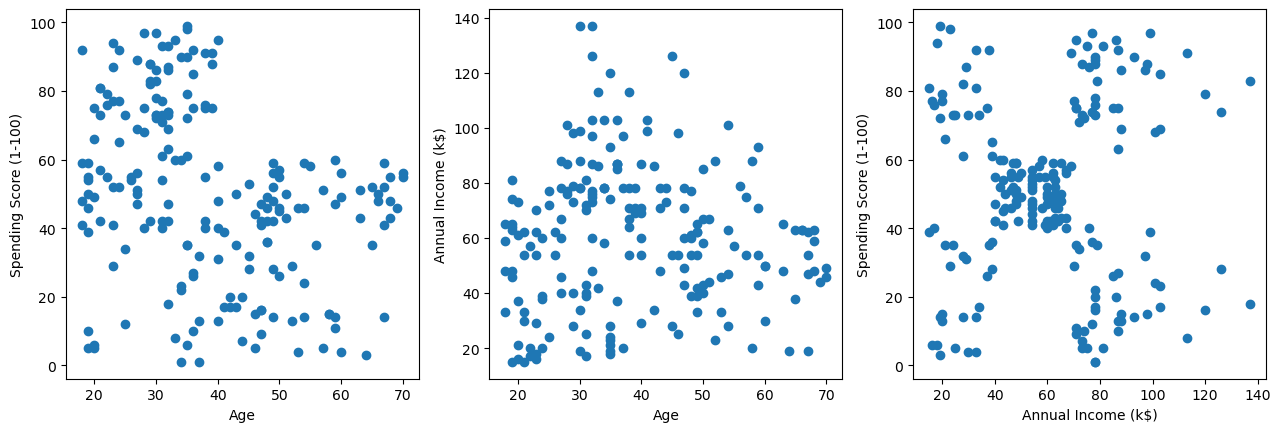

In [4]:
plt.subplots_adjust(right=2.0)
plt.subplot(1, 3, 1)
plt.scatter(df_customers["Age"], df_customers["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

plt.subplot(1, 3, 2)
plt.scatter(df_customers["Age"], df_customers["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

plt.subplot(1, 3, 3)
plt.scatter(df_customers["Annual Income (k$)"], df_customers["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()

In [5]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(df_customers)
    wcss.append(km.inertia_)


C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

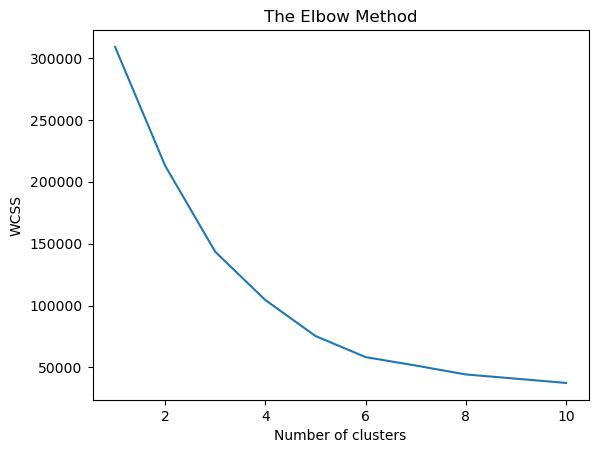

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
k = 5
km = KMeans(n_clusters=k)
km.fit(df_customers)
df_customers["clusters"] = km.labels_

# Display the number of data objects in each cluster
print('No. of data objects in each cluster:')
print(df_customers['clusters'].value_counts())

# Display the centroids of the clusters assigned
print('Centroids of the clusters assigned:')
print(km.cluster_centers_)

C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


No. of data objects in each cluster:
1    77
3    39
2    36
4    25
0    23
Name: clusters, dtype: int64
Centroids of the clusters assigned:
[[45.2173913  26.30434783 20.91304348  0.39130435]
 [43.72727273 55.48051948 49.32467532  0.4025974 ]
 [40.66666667 87.75       17.58333333  0.52777778]
 [32.69230769 86.53846154 82.12820513  0.46153846]
 [24.96       28.04       77.          0.44      ]]


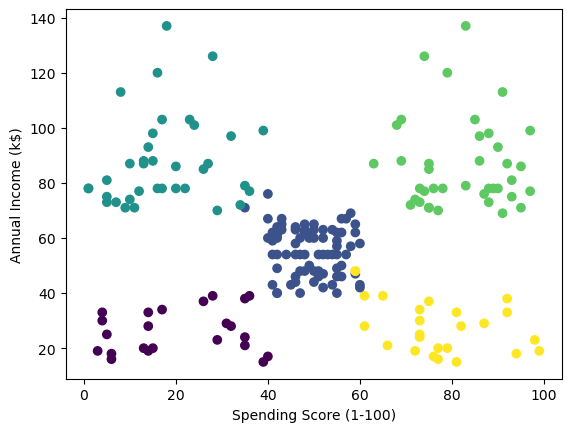

Sum of Squared Error (SSE) = 75528.58656469134


In [8]:
plt.scatter(df_customers["Spending Score (1-100)"], df_customers["Annual Income (k$)"], c=df_customers["clusters"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

# Evaluation of the model - Sum of Squared Error (SSE)
sse = km.inertia_
print('Sum of Squared Error (SSE) =', sse)
